<a href="https://colab.research.google.com/github/YMGYM/google_colab_files/blob/master/Image_Text_Embedding_with_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

투빅스 12회 추천 컨퍼런스 Img2Seq(Show And Tell) 의 코드 정리입니다.

`Kor2Vec` 과 `pytorch` 를 사용했습니다.

# 기본 다운로드 및 임포트

In [1]:
!pip install git+https://github.com/naver/kor2vec.git

  Cloning https://github.com/naver/kor2vec.git to /tmp/pip-req-build-364n_puw
  Running command git clone -q https://github.com/naver/kor2vec.git /tmp/pip-req-build-364n_puw
  Created wheel for kor2vec: filename=kor2vec-1.0.1-cp37-none-any.whl size=21946 sha256=d473a81ae9cfa0015de2f2d79722f8f8dc25771363d3b35c18fde73fd3e09e72
  Stored in directory: /tmp/pip-ephem-wheel-cache-o3g_gsk0/wheels/b7/74/03/492f7af08e1f00c56765b0f6a25f28a086cc23db1827f269a4
Successfully built kor2vec


In [3]:
from kor2vec import Kor2Vec # Kor2Vec import

import pandas as pd
import numpy as np
import os
from PIL import Image
import torch
import torchvision.models as models # 임베딩 모델
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

# 기본 변수 정의

In [4]:
# 리뷰 테이블 읽어오기
review = pd.read_csv('/content/drive/MyDrive/Datasets/img_review_tag_df_final_20210624 (2).csv', encoding='cp949')

In [5]:
!unzip -O euc-kr -q /content/drive/MyDrive/Datasets/img_preprocess_final_20210624.zip -d data

17번가_1.jpg:  mismatching "local" filename (17踰媛_1.jpg),
         continuing with "central" filename version
17번가_2.jpg:  mismatching "local" filename (17踰媛_2.jpg),
         continuing with "central" filename version
17번가_3.jpg:  mismatching "local" filename (17踰媛_3.jpg),
         continuing with "central" filename version
1945카페_1.jpg:  mismatching "local" filename (1945移댄_1.jpg),
         continuing with "central" filename version
1945카페_2.jpg:  mismatching "local" filename (1945移댄_2.jpg),
         continuing with "central" filename version
1945카페_3.jpg:  mismatching "local" filename (1945移댄_3.jpg),
         continuing with "central" filename version
298카페_1.jpg:  mismatching "local" filename (298移댄_1.jpg),
         continuing with "central" filename version
298카페_2.jpg:  mismatching "local" filename (298移댄_2.jpg),
         continuing with "central" filename version
298카페_3.jpg:  mismatching "local" filename (298移댄_3.jpg),
         continuing with "central" filename 

In [6]:
# 없는 파일 인덱스 파악
result = []
all_img = [f for f in os.listdir('/content/data') if os.path.isfile(os.path.join('/content/data', f))]

for idx, imgName in enumerate(review['imgname_123']):
  if imgName not in all_img or imgName == 'desktop.ini':
    result.append(idx)


result

[753, 4400, 4568, 5166]

In [7]:
# 잘못된 이미지 파일 제거
review.drop(result, inplace=True)
review.dropna(inplace=True)
review = review.reset_index(drop = True)

In [53]:
# 리뷰 데이터를 사용해 임베딩을 학습 실시

rev = pd.Series('<SOS> ' + review['review'] + " <EOS>")
rev.to_csv("review_corpus.csv", index=False)


kor2vec = Kor2Vec(embed_size=32) # embed_size : 임베딩 벡터의 2번째 차원(차원 수)
"""
train([텍스트 데이터 파일 - 위에서 저장, 모델 저장 위치, 학습 배치 사이즈])
"""
kor2vec.train("review_corpus.csv", 'model.kor2vec', batch_size=128) # 임베딩 실시 (학습)
kor2vec.save("/content/drive/MyDrive/koremb_tobigs/embedding") # 임베딩 모델 저장

Corpus Sampling:   0%|          | 0/19833 [00:00<?, ?it/s]

Reading Corpus lines


EP 0:   1%|          | 6/1025 [00:00<00:17, 57.84it/s]

Training kor2vec
Loading Word_sample corpus
Loading corpus finished
CUDA Available/count: True 1
training on  cuda:0


EP 1:   1%|          | 9/1025 [00:00<00:12, 83.88it/s]

{'epoch': 0, 'train_ep_loss': 1.313056596197733}


EP 2:   1%|          | 8/1025 [00:00<00:13, 72.65it/s]

{'epoch': 1, 'train_ep_loss': 1.2139940323480745}


EP 3:   1%|          | 8/1025 [00:00<00:12, 78.51it/s]

{'epoch': 2, 'train_ep_loss': 1.1684284011329094}


EP 4:   1%|          | 8/1025 [00:00<00:13, 74.27it/s]

{'epoch': 3, 'train_ep_loss': 1.1322119078403565}


EP 5:   1%|          | 9/1025 [00:00<00:13, 77.96it/s]

{'epoch': 4, 'train_ep_loss': 1.1039282398107575}


EP 6:   1%|          | 9/1025 [00:00<00:12, 79.38it/s]

{'epoch': 5, 'train_ep_loss': 1.0794708621211169}


EP 7:   1%|          | 8/1025 [00:00<00:14, 72.44it/s]

{'epoch': 6, 'train_ep_loss': 1.0583994393232392}


EP 8:   1%|          | 9/1025 [00:00<00:12, 80.94it/s]

{'epoch': 7, 'train_ep_loss': 1.0396935261168132}


EP 9:   1%|          | 8/1025 [00:00<00:13, 75.40it/s]

{'epoch': 8, 'train_ep_loss': 1.022493497860141}


EP 9: 100%|██████████| 1025/1025 [00:12<00:00, 79.23it/s]

{'epoch': 9, 'train_ep_loss': 1.0069241260319222}


In [9]:
kor2vec = Kor2Vec.load("/content/drive/MyDrive/koremb_tobigs/embedding")

In [10]:
kor2vec.vocab.from_seq([[6620, 1513], [6620, 1513]])

[['안', '녕'], ['안', '녕']]

In [11]:
class CaptionDataset(Dataset):
    """
    root_dir : 이미지 파일이 있는 경로
    captions_file : 이미지 제목-리뷰가 포함된 데이터프레임
    transform : 이미지를 텐서로 변환할 때 transform (optional)
    """
    def __init__(self, img_dir, caption_df, transform=None):
        self.root_dir = img_dir
        self.transform = transform
        self.df = caption_df
        
        self.imgs = self.df['imgname_123'] # 이미지 파일 경로
        self.captions = self.df["review"] # 리뷰 데이터
        self.kor2vec = Kor2Vec.load("/content/drive/MyDrive/koremb_tobigs/embedding") # Kor2Vec 로드
        
    
    def __len__(self):
        return len(self.df)
    
    # 이미지, 텍스트를 불러 오는 메소드
    # transform을 선언하면 임베딩 벡터와 1개 배치로 반환하며, 선언하지 않으면 이미지와 스트링 형태의 캡션을 반환합니다.
    def __getitem__(self,idx):
        caption = self.captions[idx] # target caption
        
        img_name = self.imgs[idx] # 이미지 이름 파일 불러오기
        img_location = os.path.join(self.root_dir,img_name) # 실제로 이미지 오픈
        img = Image.open(img_location).convert("RGB")
        
        # transform이 있다면 실시 후 배치화(1 차원 추가)
        if self.transform is not None:
          img = self.transform(img)
          # 정답 임베딩 데이터 
          # seq_len을 15로 통일하고자 합니다.
          caption = self.kor2vec.embedding(caption, seq_len=15)

        return img, caption

이걸 구현해 보려는 시도
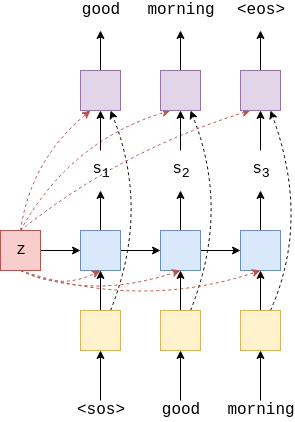

In [12]:
# from https://github.com/bentrevett/pytorch-seq2seq/blob/master/2%20-%20Learning%20Phrase%20Representations%20using%20RNN%20Encoder-Decoder%20for%20Statistical%20Machine%20Translation.ipynb
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, dropout):
        super().__init__()
        self.hid_dim = hid_dim
        self.output_dim = output_dim
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.GRU(emb_dim + hid_dim, hid_dim)
        self.fc_out = nn.Linear(emb_dim + hid_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)

        # self.kor2vec = Kor2Vec.load("/content/drive/MyDrive/koremb_tobigs/embedding")

    def forward(self, input, hidden, context):
        
        #input = [batch_size]
        #hidden = [n layers * n directions, batch size, hid dim]
        #context = [n layers * n directions, batch size, hid dim]
        
        #n layers and n directions in the decoder will both always be 1, therefore:
        #hidden = [1, batch size, hid dim]
        #context = [1, batch size, hid dim]
        
        embedded = self.dropout(input)
        
        #embedded = [1, batch size, emb dim]
        emb_con = torch.cat((embedded, context), dim = 2)
            
        #emb_con = [1, batch size, emb dim + hid dim]
            
        output, hidden = self.rnn(emb_con, hidden)
      
        #output = [seq len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        
        #seq len, n layers and n directions will always be 1 in the decoder, therefore:
        #output = [1, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        output = torch.cat((embedded.squeeze(0), hidden.squeeze(0), context.squeeze(0)), 
                           dim = 1)
        
        #output = [batch size, emb dim + hid dim * 2]
        
        prediction = self.fc_out(output)
        
        #prediction = [batch size, output dim]
        
        return prediction.unsqueeze(0), hidden

In [81]:
class Net(nn.Module):
  """
  신경망 파일
  hidden_size : kor2vec의 embedding size 로 맞춰야 합니다.
  """
  def __init__(self, seq_len = 15, embedding_size = 64, hidden_size = 64):
    super(Net, self).__init__()
    self.seq_len = seq_len
    self.embedding_size = embedding_size
    self.hidden_size = hidden_size
    self.resnet = models.resnet18(pretrained=True)
    self.decoder = Decoder(self.hidden_size, self.embedding_size, self.hidden_size, 0.5)
    self.kor2vec = Kor2Vec.load("/content/drive/MyDrive/koremb_tobigs/embedding")

    # resNet의 모든 파라미터를 잠그고 마지막 레이어만 얼리지 않고 사용합니다.
    for param in self.resnet.parameters():
       param.requires_grad = False
    self.resnet.fc = nn.Linear(512, 256) # 마지막 레이어만 다시 사용합니다.
    self.fc2 = nn.Linear(256, 64) # 마지막 레이어만 다시 사용합니다.
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()
    # kor2vec의 모든 파라미터를 얼립니다.
    for param in self.kor2vec.parameters():
       param.requires_grad = False

  def forward(self, x):
    batch_size = x.shape[0]
    x = self.resnet(x) # resnet 통과 output: (batch, hidden)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x).reshape(1,batch_size,self.hidden_size)
    hidden = x # lstm의 초기 셀 값은 resNet의 출력입니다.
    outputs = torch.zeros(self.seq_len, batch_size, self.hidden_size).to(device) # sequence를 저장하기 위한 빈 배열
    

    # <sos> 를 시작 토큰으로 설정합니다.
    output = self.kor2vec.embedding('<sos>').unsqueeze(0).repeat(1, batch_size, 1).to(device)

    # seq 결과물을 lstm의 입력으로 사용하여 seq_len = 15 만큼 반복하여 저장합니다.
    for t in range(0, self.seq_len):
        output, hidden = self.decoder(output, hidden, x ) 
        outputs[t] = output
        

    return outputs.reshape(batch_size, self.seq_len, self.embedding_size) # shape: (15, batch_size, 1000)


  def give_embedding(self, x):  # 원도 추가 부분
    batch_size = x.shape[0]
    x = self.resnet(x) # resnet 통과 output: (batch, hidden)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x).reshape(1,batch_size,self.hidden_size)
    
    hidden = x # lstm의 초기 셀 값은 resNet의 출력입니다.
    outputs = torch.zeros(self.seq_len, batch_size, self.embedding_size).to(device) # sequence를 저장하기 위한 빈 배열
    

    # <sos> 를 시작 토큰으로 설정합니다.
    output = self.kor2vec.embedding('<sos>').unsqueeze(0).repeat(1, batch_size, 1).to(device)

    # seq 결과물을 lstm의 입력으로 사용하여 seq_len = 15 만큼 반복하여 저장합니다.
    output, hidden = self.decoder(output, hidden, x ) 
        
    return hidden
  
  def give_resnet_embedding(self, x):  # 원도 추가 부분
    batch_size = x.shape[0]
    x = self.resnet(x) # resnet 통과 output: (batch, hidden)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x).reshape(1,batch_size,self.hidden_size)

    hidden = x # lstm의 초기 셀 값은 resNet의 출력입니다.
    return hidden

  # model.train() 을 위해 메소드 오버라이딩
  def train(self, mode=True):  
    self.training = mode
    for module in self.children():
      if module != self.kor2vec:
        module.train(mode)
    return self

  # model.eval() 을 위한 설정
  def eval(self, mode=False): 
    # self.training = mode
    for module in self.children():
      if module != self.kor2vec:
        module.train(mode)
    return self

# 실제 코드 불러와서 사용

매장이 넓어서 가디 근처에 조용한 카페 찾을때 좋을듯. 흑임자라떼 맛있음


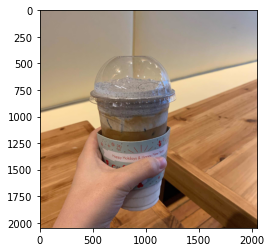

In [63]:
# 이미지 표시 : transform을 None으로 놓고 사용
img_data = CaptionDataset('/content/data', review, transform=None)
img, rev = img_data[6666]

print(rev)
plt.imshow(img)
plt.show()

In [15]:

transform = transforms.Compose(
    [transforms.ToTensor(), # 텐서로 변형
     transforms.Resize(224), # 사이즈 조절
     transforms.CenterCrop(224), # 가로와 세로 중 안 맞는 곳 자르기
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [79]:
train_data = CaptionDataset('/content/data', review, transform=transform)

img, rev = train_data[0]

print(f"img shape : {img.shape}") # ([1, 3, 224, 224]) - [배치, 채널, 가로, 세로]
print(f"rev : {rev.shape}") # ([15, 1000]) - [seq_len, hidden_size]

img shape : torch.Size([3, 224, 224])
rev : torch.Size([15, 32])


In [17]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)

In [18]:
img, rev = next(iter(train_dataloader))

In [82]:
model = Net(embedding_size=32)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [55]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [83]:
model.to(device)

Net(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [84]:
data, rev = next(iter(train_dataloader))

In [48]:
rev.shape

torch.Size([128, 15, 64])

In [85]:
# 신경망 학습
for epoch in range(5): # 5에포크
  running_loss = 0.0
  model.train()
  for i, data in enumerate(train_dataloader):
    img, label = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    output = model(img)


    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    
    if i>= len(train_dataloader) - 1: break # 왜인지 모르겠으나 묵시적으로 enumerate가 종료되지 않아서 명시적으로 추가
    
    if (i % 10) == 0 and i != 0: # 매 10번 미니배치마다 출력하기
            print('[%d, %5d] loss: %.3f' %
                  (epoch +1, i+1, running_loss / 10))
            running_loss =0.0

RuntimeError: ignored

# tsne 코드

In [ ]:
!pip install lapjv==1.3.12 -q

In [ ]:
import numpy as np
import os, argparse
import matplotlib as mlp
import matplotlib.pyplot as plt
from PIL import Image
from lapjv import lapjv
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist


out_res = 64
out_name = 'tsne_grid.jpg'
out_dim = 40
to_plot = np.square(out_dim)
perplexity = 50
tsne_iter = 5000
in_dir = '/content/data'
out_dir = './'

img_table = review


def get_activations(model, img_collection):
    activations = []
    for idx in range(len(img_collection)):
        if idx == to_plot:
            break;

        if idx % 1000 == 0:
          print("image ~{} processed.".format(idx+1))

        img = review['imgname_123'][idx]
        img = os.path.join(in_dir, img)

        open_img = Image.open(img).convert('RGB')
        img = transform(open_img)

        pred = model(img.unsqueeze(0).to(device)) # (15, hidden)
        color_img = np.array((open_img.resize((10,10))))

        act = np.concatenate((pred.flatten().cpu().detach().numpy(), color_img.flatten()))
        activations.append(act)
    return activations

def generate_tsne(activations):
    tsne = TSNE(perplexity=perplexity, n_components=2, init='random', n_iter=tsne_iter)
    X_2d = tsne.fit_transform(np.array(activations)[0:to_plot,:])
    X_2d -= X_2d.min(axis=0)
    X_2d /= X_2d.max(axis=0)
    return X_2d

def save_tsne_grid(img_collection, X_2d, out_res, out_dim):
    grid = np.dstack(np.meshgrid(np.linspace(0, 1, out_dim), np.linspace(0, 1, out_dim))).reshape(-1, 2)
    cost_matrix = cdist(grid, X_2d, "sqeuclidean").astype(np.float32)
    cost_matrix = cost_matrix * (100000 / cost_matrix.max())
    row_asses, col_asses, _ = lapjv(cost_matrix)
    grid_jv = grid[col_asses]
    out = np.ones((out_dim*out_res, out_dim*out_res, 3), dtype=np.uint8)

    for pos, img in zip(grid_jv, img_collection['imgname_123'][0:to_plot]):
        img = os.path.join(in_dir, img)
        open_img = Image.open(img).convert('RGB')
        open_img = open_img.resize((out_res,out_res))
        h_range = int(np.floor(pos[0]* (out_dim - 1) * out_res))
        w_range = int(np.floor(pos[1]* (out_dim - 1) * out_res))
        out[h_range:h_range + out_res, w_range:w_range + out_res] = np.array(open_img)
   

    im = Image.fromarray(out)
    im.save(out_dir + out_name, quality=100)

print("hello")
sampled_img = img_table.sample(n=(out_dim*out_dim)).reset_index(drop=True)

activations = get_activations(model, sampled_img)
print("Generating 2D representation.")
X_2d = generate_tsne(activations)
print("Generating image grid.")
save_tsne_grid(sampled_img, X_2d, out_res, out_dim)

hello
image ~1 processed.
image ~1001 processed.
Generating 2D representation.
Generating image grid.


# 추천 10개 표시

In [50]:
# 가장 유사한, 가장 유사하지 않은 것 비교 코드


i_list = []
resnet_embed_list = []
embed_list = []

# 모든 이미지에 대한 임베딩 계산
for i, data in enumerate(train_data):
    model.eval()
    
    img, label = data[0].to(device), data[1].to(device)
    img = img.unsqueeze(0)
    resnet_embed = model.give_resnet_embedding(img)[0].cpu().detach().numpy()[0][0]
    embed = model.give_embedding(img)[0].cpu().detach().numpy()[0][0]


    i_list.append(i)
    embed_list.append(embed)
    resnet_embed_list.append(resnet_embed)

    if i>= len(train_data) - 1: break

    if i%100 == 0:
      print(f"image done : {i}")

image done : 0
image done : 100
image done : 200
image done : 300
image done : 400
image done : 500
image done : 600
image done : 700
image done : 800
image done : 900
image done : 1000
image done : 1100
image done : 1200
image done : 1300
image done : 1400
image done : 1500
image done : 1600
image done : 1700
image done : 1800
image done : 1900
image done : 2000
image done : 2100
image done : 2200
image done : 2300
image done : 2400
image done : 2500
image done : 2600
image done : 2700
image done : 2800
image done : 2900
image done : 3000
image done : 3100
image done : 3200
image done : 3300
image done : 3400
image done : 3500
image done : 3600
image done : 3700
image done : 3800
image done : 3900
image done : 4000
image done : 4100
image done : 4200
image done : 4300
image done : 4400
image done : 4500
image done : 4600
image done : 4700
image done : 4800
image done : 4900
image done : 5000
image done : 5100
image done : 5200
image done : 5300
image done : 5400
image done : 5500
imag

target img : 300
9, 사진에 있는 와플이 4천원 밖에안함 ,,, 대학교 앞이여서 그런지 가성비 갑..<U+0001F44D><U+0001F3FB> 커피는 쏘쏘


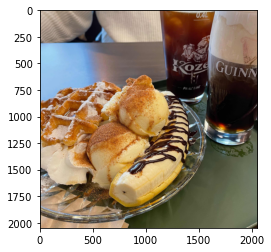

가장 가까운 이미지
0, 사진에 있는 와플이 4천원 밖에안함 ,,, 대학교 앞이여서 그런지 가성비 갑..<U+0001F44D><U+0001F3FB> 커피는 쏘쏘, distance : 0.0


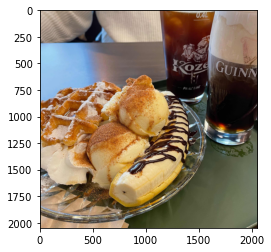

1, 명동에 분위기 좋은 카페! 음료도 (약간 비싸지만) 맛있어요. 다만 마카롱은 빵카롱이라 살짝 실망.., distance : 1.1175870895385742e-07


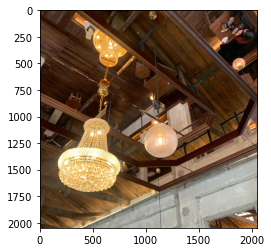

2, 깔끔하고 여자들이 좋아하는 느낌. 주인 분의 친절함도 좋음., distance : 5.662441253662109e-07


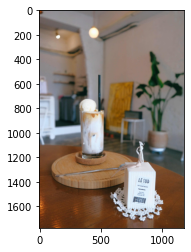

3, 홍차와 케익이 있는 예쁜 카페네요 옆에 스시집 왔다가 너무 예뻐서 홀려서 들어갔는데 케익이 너무 예쁜데 가격에 거품이 없어서 너무 좋네요 홍차도 자체 블랜딩한것도 있고 리쉬 홍차를 비싸지 않은 가격에 마실수 있어어 좋았어요 안 없어지고 계속 있길. 레몬케익은 집에 와서 먹어봤는데 상큼하고 개운해서 홍차와 커피에 아주 잘 어울려요 맛있습니다 재방문의사 있어요, distance : 8.121132850646973e-07


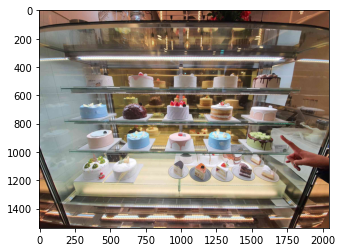

4, 대부분 모든빵이 맛있다.커피도 제대로한다. 좋은재료로 만들어서 비싸도 납득이간다., distance : 9.313225746154785e-07


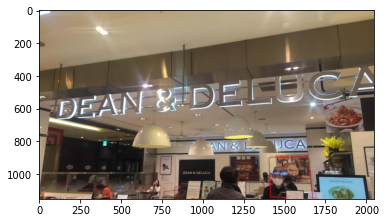

5, 매장이 엄청 넓고 깨끗함
갤러리랑 같이 운영하는듯 한데 자세히는 안 알아봄
혼자 작업하는사람들이 많음
먹은건 흑임자 크림이 든 앙버터 라는데
팥버터랑은 생각만큼 조화롭지 않아서 실망
구운 치아바타빵은 빠작하고 맛있었음
이 일대와 매장크기에 비해 전체적으로 합리적인 가격인것같음, distance : 1.475214958190918e-06


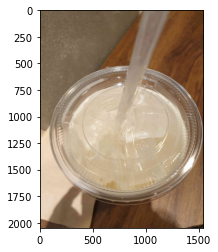

6, 점원분들은 완전 친절하세요 !그런데 공휴일 오전에 갔더니 웨이팅이 정말 길었고 사람이 많은데 내부 구조가 소리가 울려서 너무너무 시끄러웠어요ㅠ 창문을 열어두거나 하면 좋을 것 같아요, distance : 1.6391277313232422e-06


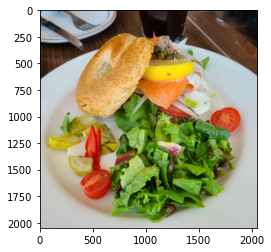

7, 원두구매하기도 좋고 맛있는 커피를 즐기기에도 좋다. 가까이있으면 매번 가고 싶은 곳, distance : 2.0042061805725098e-06


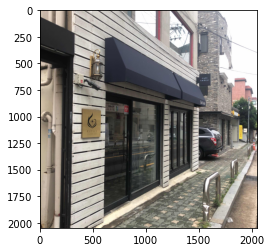

8, 앉을 자리는 있지만.. 매번 사서 집에서 먹는데 마카롱과 다쿠아즈도 맛있지만 레몬케이크는 정말 맛있었다, distance : 2.0936131477355957e-06


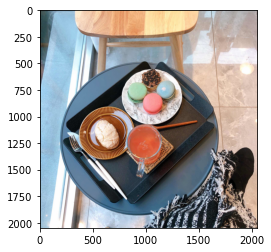

9, 삼성동에 방문해서 너무 더워서 들어가본 카페입니다! 아보카도샌드위치가 맛있었어요!, distance : 2.5033950805664062e-06


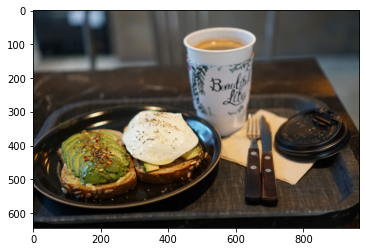

가장 먼 이미지
0, 테이블이 3개밖에 없어서 매장이 매우작음. 컵케익 존맛임. 사람없을때 가야함. 재방문의사있음, distance : 0.0058978646993637085


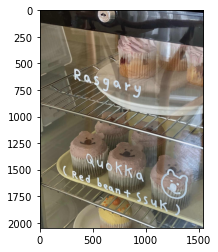

1, 테이블이 작아서, 의자도 불편해요
감성카페 느낌이어서 갈만해요
커피맛은 좋았음, distance : 0.005967721343040466


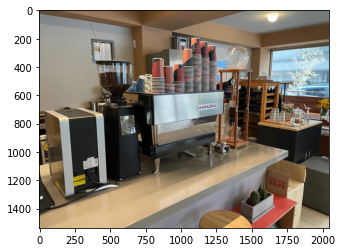

2, 음식은 건강한 맛이에요. 가격대가 3500~6500원대이고 양은 적당한 편입니다. 스콘이나 케이크류도 있는데 생각보다 많이 비싸서 놀랐습니다. 야외에 테이블이 있는데 날이 좋을 때 앉아서 수다 떨기 좋고 밤엔 전구 조명도 있어서 분위기가 좋을 것 같아요. 화장실도 깨끗하고 카페는 전체적으로 청결합니다. 1층이랑 지하 1층이 있는데, 지하 1층이 훨씬 크고 넓어요. 옷을 걸어두는 행거와 옷걸이도 있고 읽을 책이나 잡지도 있어요. 동국대가 바로 근처라 학생들이 팀플하기 딱 좋아요. 큰 테이블이 많고 테이블마다 콘센트와 멀티탭이 있어서 작은 테이블에도 3개의 콘센트가 있어요., distance : 0.005969911813735962


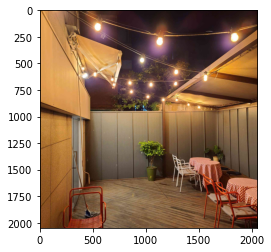

3, 여기 사람무시하는곳임, distance : 0.006203249096870422


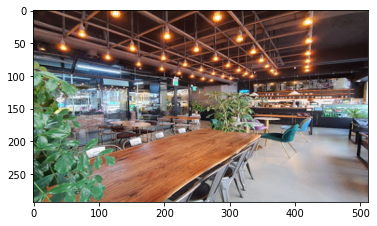

4, 화곡역 바로 앞에 있고 탁 틔인 디자인에 깔끔해서 좋았다. 아메리카노도 무난했고, distance : 0.006344035267829895


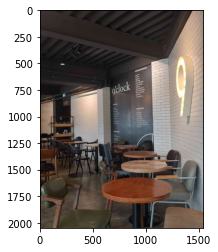

5, - 미니 테이블 2개 정도 있는 아주 작은 카페
- 음료 사이즈 크고 메뉴가 엄청 다양함. 가성비 좋아서 배달손님이 많음
- 모든 음료 1000원 추가 시 사이즈 업 가능합니다, distance : 0.006431318819522858


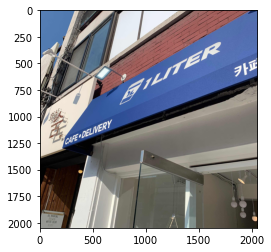

6, 수유에서 보기 드문 깔끔한 카페. 크로플이랑 다쿠아즈도 판매한다. 인테리어도 예쁘고, 음료 양도 많은 편. 혼자 가도 좋을 카페., distance : 0.00658474862575531


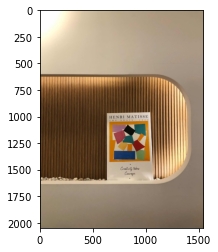

7, 아 저 카라멜 브레드 때문에 좀 아니다 싶어서 후기 남깁니다. 오랫동안 신천역의 터줏대감으로 자리잡아잇는데 어제 저 빵은 정말 실망스러웠습니다 맘같아서는 환불해달라고 진상부리고 싶엇는데 다코후기로 대신합니다. 카라멜 부레드라고 해서 엄청오래기다렸는데 냉동해놨던 빵인지 해동정도만 되고 딱딱하고 매말라서 크림을 아예부어버려서 촉촉한척 하려고 햇더라고요 바깥쪽에 빵이 맛잇는집이라고 써붙여놧던데 다시는 안 먹을 듯 합니다 커피는 평타에요 가격은 모르겟지만, distance : 0.006723001599311829


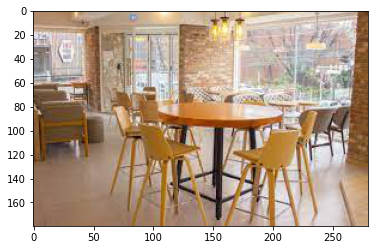

8, 한적한 곳에 위치해 있어서 좋았어요. 커피도 맛있었고 첫 방문이라 원두 설명도 꼼꼼히 해 주셔서 좋았습니다. 원두 외에도 굿즈등도 판매하고 있어요., distance : 0.006938286125659943


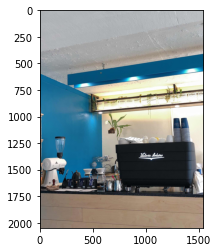

9, 아기자기하고 아늑한 분위기의 카페이고 나름 메뉴도 다양해요, distance : 0.007322199642658234


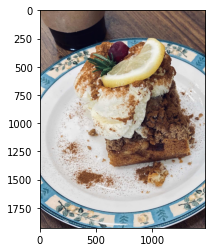

In [52]:
# text embedding 을 한 것을 통해 target image와 가장 가까운 10개, 가장 먼 10개 보여주기
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt

tmp = np.array(embed_list).reshape(-1,1)
dist_mtx = euclidean_distances(tmp,tmp)

target_idx = 300

# 가장 가까운 것의 인덱스를 제공해준다
# ex target_idx가 200이라면, 첫 인덱스는 200
close_list = dist_mtx[target_idx].argsort()[0:10]
far_list = dist_mtx[target_idx].argsort()[-11:-1]

print(f"target img : {target_idx}")
img, rev = img_data[target_idx]
print(f"{i}, {rev}")
plt.imshow(img)
plt.show()


print("가장 가까운 이미지")
print("======================")
# target을 포함해 target과 가장 가까운 것 10개
for i, idx in enumerate(close_list):
    img, rev = img_data[idx]
    print(f"{i}, {rev}, distance : {dist_mtx[target_idx][idx]}")
    plt.imshow(img)
    plt.show()

print("가장 먼 이미지")
print("======================")
# target과 가장 먼것 10개
for i, idx in enumerate(far_list):
    img, rev = img_data[idx]
    print(f"{i}, {rev}, distance : {dist_mtx[target_idx][idx]}")
    plt.imshow(img)
    plt.show()



target img : 200
9, 카페에 있는 강아지가 귀엽습니다. 레몬티는 좀 싱겁다는 반응인데 제 입에는 맞았습니다.


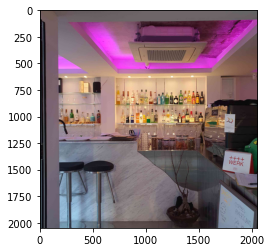

가장 가까운 이미지
0, 카페에 있는 강아지가 귀엽습니다. 레몬티는 좀 싱겁다는 반응인데 제 입에는 맞았습니다., distance : 0.0


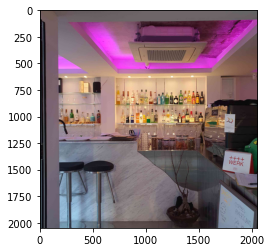

1, 생일카페 때문에 갔던 곳인데 원래도 케이크 예뻐서 유명한 곳이라고 한다. 실제로도 케이크가 진짜 너무너무 예뻤고 맛있기까지 했다. 달고나 라떼도 난생 처음 도전해봤는데 달달한 살짝 탄맛나는 커피인거같아거 너무 맛있었다., distance : 1.049041748046875e-05


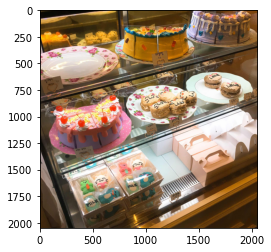

2, 투숙객 할인 10% 받아서 좀 더 저렴하게 이용함. 좌석도 꽤 많고 음식이 신선해서 맛있었음. 특히 육회랑 디저트 종류가 맛있었음, distance : 5.3048133850097656e-05


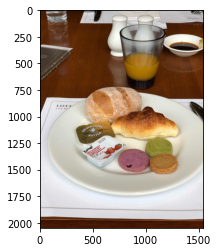

3, 동네 큰 카페. 가격이 정말 맘에 든다. 커플이나 젊은 사람들보다는 모임하는 어르신들ㅇ 더 많음, distance : 6.866455078125e-05


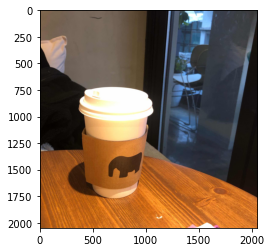

4, 조용하고 넓직해서 데이트하기 좋고 차나 술을 하기도 괜찮은 분위기였고 가격 괜찮고 주변카페 대비 영업시간이 길어서 좋았음, distance : 0.00013005733489990234


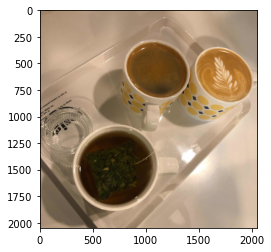

5, 너무너무 예쁜 카페예요~
의자가 각각 다르구
아기자기하게 꾸며있어요!
외관이 예쁘구요!, distance : 0.00016033649444580078


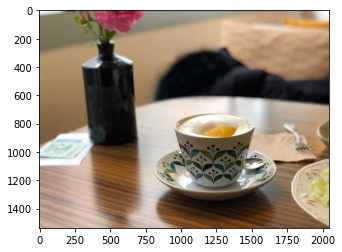

6, 병원 앞에 카페를 찾다가 방문한 곳. 저렴한 가격, 친절한 응대, 기호에 맞는 커피맛이 만족스러웠다., distance : 0.00020611286163330078


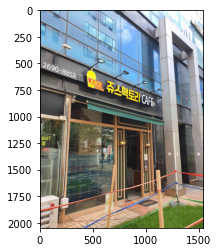

7, 밀키 우롱을 주문했고 차는 맑은데 뒤에는 우유의 맛이 느껴져서 신기했습니다. 같이 주는 호두 스낵도 맛있습니다., distance : 0.00023663043975830078


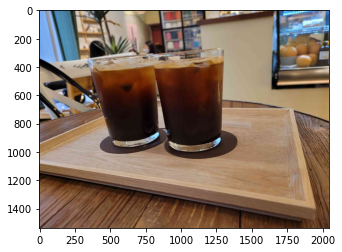

8, 드립 커피를 맛있게 해줘서 양재천 산책 전후에 들리고는 합니다. 케이크도 보기보다 괜찮네요, distance : 0.00024318695068359375


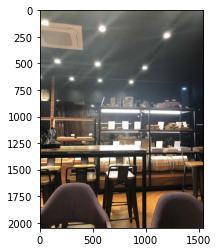

9, 지인소개로 가게 되었는데 커피도 맛있고 뷰도 좋았다.
테이블 간격도 넓어서 좋았음.
주말에 가면 웨이팅있을듯하다., distance : 0.00030219554901123047


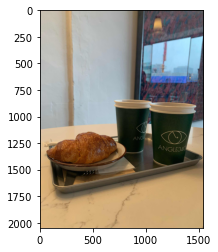

가장 먼 이미지
0, 힙지로에서 핫한 카페,, 간판이 없어서 겨우 찾아서 들어갔는데 레트로하면서 유니크한 분위기에 반했네요 음료는 맛은 보통인듯~ 아이스 초콜릿 차이 밀크티 괜춘했어용, distance : 1.625841736793518


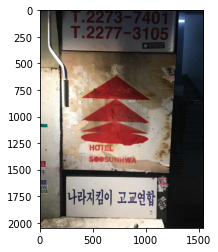

1, 테이크아웃시 -1000원이 메리트 있어요. 커피향도 정말 좋고 맛도 풍부하고 진해요., distance : 1.6875743865966797


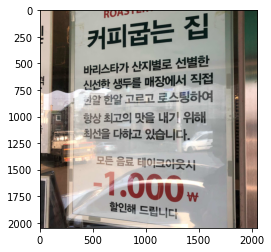

2, 이런곳이 카페가 있다고..? 하는곳에 있는 을지로 감성 뿜뿜한 쌍문역 카페 오픈더도어
사장님도 친절하시고 달달하고 귀여운 당근케이크 맛집 !, distance : 1.6961873769760132


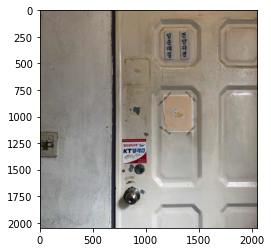

3, 홍대점에서 처음 가봤는데 맛이 괜찮아서 이 지점에도 방문해봤어요. 동윤영이 메뉴로 있는 게 너무 반가워서 주문해봤는데 맛이 괜찮네요. 현대백화점에서 파르나스몰 잇는 통로에 바로 있습니다., distance : 1.704819917678833


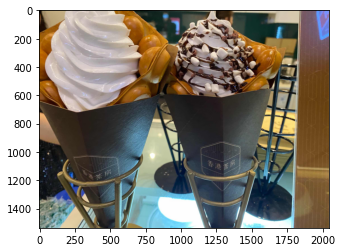

4, 과일이 올라가는 토스트를 주문했는데 커팅을 잘못 했다며 마시멜로토스트를 같이 주었다.
밀크티도 깔끔하고 토스트는 맛 없을 수가 없는 조합..
좁긴한데 가죽공예품을 한켠에서 같이 판다.
갔을때 사장님과 친구분이 떡볶이를 시켜먹어서인지 냄새가 좀 났던거 빼고는 나쁘지 않다.
이런 인스타감성의 카페가 땡길때 한번쯤 가볼 만 한 것 같다., distance : 1.7054038047790527


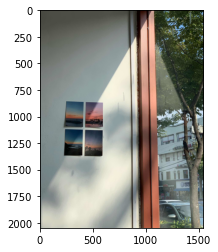

5, 매장도 이쁘고 빵들도 다 너무 맛있어요!
친절하게 맞아주시고 포장도 정성스럽게 해주셨어요.
먹은 것 중에 당근 케잌이 제일 맛있었고 상큼달콤한 딸기와 크림의 타르트도 좋았어요!, distance : 1.707017183303833


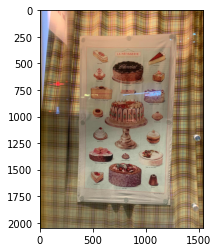

6, 위치는 송리단길에서 좀 떨어져있는 큰길가 건물이라 사람이 있을까 싶었는데 입구에서 부터 느껴지는 핫플레이스 사운드.. 개인적으로 사람많은 카페는 싫어하는지라 별 기대 안하고 들어갔습니다. 커피는 너무 비쌌어요. 자리값인듯.. 솔티드는 제 취향이 아니었지만 아이스코코넛라떼는 맛있었어요. 테라스쪽에는 이미 만석이라 안쪽 소파에 앉아있다가 윗층 포토존이라는 곳에 올라가봤는데 왜 여기가 사람들한테 유명한 카페인지 알겠더라구요. 롯데타워가 바로 보이는 야경이 사진찍기에 너무 이뻤습니다. 연인들이나 가족들 친구들이 한번쯤 사진찍으러 오기에 괜찮은거 같아요. 공휴일이나 주말 저녁은 피해서 가는걸 추천합니다!, distance : 1.7295504808425903


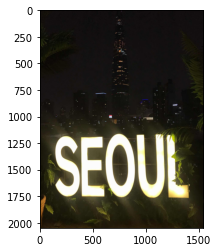

7, 비엔나 커피 크림이 정말 맛있어요! 내부도 생각보다 넓어요!, distance : 1.7396628856658936


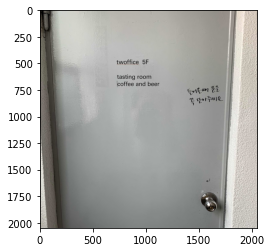

8, 케잌이 달면서도 물리지 않고 계속 들어가네요 ㅠㅜ 음료도 라지컵 가득 담아줘서 완전 만족!, distance : 1.8259650468826294


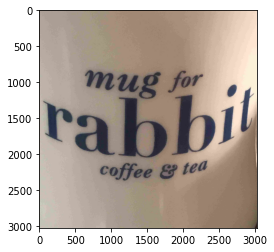

9, 테라스가 어마어마한 해방촌 카페
숨은 보석같은 카페
나만 알고 싶은 카페, distance : 1.8855054378509521


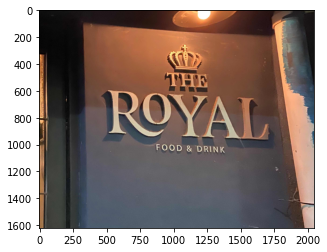

In [ ]:
# resnet embedding 만을 썼을때 target image와 가장 가까운 10개, 가장 먼 10개 보여주기
#
tmp = np.array(resnet_embed_list).reshape(-1,1)
dist_mtx = euclidean_distances(tmp,tmp)

target_idx = 200

# 가장 가까운 것의 인덱스를 제공해준다
# ex target_idx가 200이라면, 첫 인덱스는 200
close_list = dist_mtx[target_idx].argsort()[0:10]
far_list = dist_mtx[target_idx].argsort()[8226:8236]

print(f"target img : {target_idx}")
img, rev = img_data[target_idx]
print(f"{i}, {rev}")
plt.imshow(img)
plt.show()
print("======================")

print("가장 가까운 이미지")
print("======================")
# target을 포함해 target과 가장 가까운 것 10개
for i, idx in enumerate(close_list):
    img, rev = img_data[idx]
    print(f"{i}, {rev}, distance : {dist_mtx[target_idx][idx]}")
    plt.imshow(img)
    plt.show()

print("가장 먼 이미지")
print("======================")
# target과 가장 먼것 10개
for i, idx in enumerate(far_list):
    img, rev = img_data[idx]
    print(f"{i}, {rev}, distance : {dist_mtx[target_idx][idx]}")
    plt.imshow(img)
    plt.show()



In [ ]:
close_list

array([ 200, 5867, 3828, 6924,  287, 7804, 5155, 5607, 3577, 4021])

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/trained_model/recsys_cafe")

# soynlp 사용해서 데이터 토크나이징 진행

In [ ]:
!pip install soynlp

     |████████████████████████████████| 419kB 7.7MB/s 


In [ ]:
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer
from soynlp.vectorizer import BaseVectorizer

In [ ]:
corpus_path = '/content/review_corpus.csv'
corpus = DoublespaceLineCorpus(corpus_path, iter_sent=True)
word_extractor = WordExtractor()
word_extractor.train(corpus)

# (leftside cohesion, rightside cohesion)
cohesion_scores = word_extractor.all_cohesion_scores()

# use only leftside cohesion
scores = {word:score[0] for word, score in cohesion_scores.items()}
tokenizer = LTokenizer(scores=scores)

training was done. used memory 0.370 Gb
all cohesion probabilities was computed. # words = 21078


In [ ]:
vectorizer = BaseVectorizer(min_tf=1, tokenizer=tokenizer)

matrix_path = './matrix'
vectorizer.fit_to_file(corpus, matrix_path)

scanning was done                                        
15706 terms are recognized
writing to file was done. 17956 docs


In [ ]:
vectorizer.encode_a_doc_to_list('<SOS> 커피가 친절하고 사장님이 맛있어요!')

[0, 94, 226, 63, 195]

In [ ]:
vectorizer.decode_from_list([8479, 7, 5, 24, 16, 49, 8, 3, 320])

['21', '카페', '있는', '좋고', '맛이', '자주', '좋은', '<EOS>"', '옆에']

In [ ]:
vectorizer.save('/content/drive/MyDrive/koremb_tobigs/vectorizer')

In [ ]:
vectorizer.load('/content/drive/MyDrive/koremb_tobigs/vectorizer')

# DataLoader 수정

In [ ]:
class CaptionDataset(Dataset):
    """
    root_dir : 이미지 파일이 있는 경로
    captions_file : 이미지 제목-리뷰가 포함된 데이터프레임
    transform : 이미지를 텐서로 변환할 때 transform (optional)
    """
    def __init__(self, img_dir, caption_df, seq_len=15, transform=None):
        self.root_dir = img_dir
        self.transform = transform
        self.df = caption_df
    
        self.imgs = self.df['imgname_123'] # 이미지 파일 경로
        self.captions = self.df["review"] # 리뷰 데이터

        # soynlp
        self.vectorizer = BaseVectorizer(min_tf=1)
        self.vectorizer.load('/content/drive/MyDrive/koremb_tobigs/vectorizer')
    
    def __len__(self):
        return len(self.df)
    
    # 이미지, 텍스트를 불러 오는 메소드
    # transform을 선언하면 임베딩 벡터와 1개 배치로 반환하며, 선언하지 않으면 이미지와 스트링 형태의 캡션을 반환합니다.
    def __getitem__(self,idx):
        caption = self.captions[idx] # target caption
        
        img_name = self.imgs[idx] # 이미지 이름 파일 불러오기
        img_location = os.path.join(self.root_dir,img_name) # 실제로 이미지 오픈
        img = Image.open(img_location).convert("RGB")
        
        # transform이 있다면 실시 후 배치화(1 차원 추가)
        if self.transform is not None:
          img = self.transform(img)
          # 정답 임베딩 데이터 
          # seq_len을 15로 통일하고자 합니다.
          caption = self.vectorizer.encode_a_doc_to_list(caption)

          if len(caption) > 15:
            caption = caption[:15]
          elif len(caption) < 15:
            while(len(caption) != 15):
              caption.append(self.vectorizer.vocabulary_['<UNK>'])
          caption = torch.tensor(caption)
          caption = F.one_hot(caption, num_classes=len(self.vectorizer.vocabulary_))
        return img, caption

In [ ]:
# class overriding
class TobigVectorizer(BaseVectorizer):
  def __init__(self, tokenizer=lambda x:x.split(), min_tf=0,
        max_tf=99999999, min_df=0, max_df=1.0, stopwords=None,
        lowercase=True, verbose=True):
    super().__init__()

  def encode_a_doc_to_list(self, doc):
    # 언노운 토큰으로 반환하도록 오버라이딩
        return [self.vocabulary_[term] if term in self.vocabulary_ else self.vocabulary_["<UNK>"] for term in self.tokenizer(doc) ]
 

In [ ]:
vectorizer = TobigVectorizer(min_tf=1)
# vectorizer.fit_to_file(corpus, matrix_path)
vectorizer.load('/content/drive/MyDrive/koremb_tobigs/vectorizer')

In [ ]:
# 패딩과 언노운 토큰 추가
vectorizer.vocabulary_['<PAD>'] = len(vectorizer.vocabulary_)
vectorizer.vocabulary_['<UNK>'] = len(vectorizer.vocabulary_)
vectorizer.idx2vocab.append('<PAD>')
vectorizer.idx2vocab.append('<UNK>')

In [ ]:
vectorizer.encode_a_doc_to_list("<SOS>")

[0]

In [ ]:
# from https://github.com/bentrevett/pytorch-seq2seq/blob/master/2%20-%20Learning%20Phrase%20Representations%20using%20RNN%20Encoder-Decoder%20for%20Statistical%20Machine%20Translation.ipynb
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, dropout):
        super().__init__()
        self.hid_dim = hid_dim
        self.output_dim = output_dim
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.GRU(emb_dim + hid_dim, hid_dim)
        self.fc_out = nn.Linear(emb_dim + hid_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)

        # self.kor2vec = Kor2Vec.load("/content/drive/MyDrive/koremb_tobigs/embedding")

    def forward(self, input, hidden, context):
        
        #input = [batch_size]
        input = input.unsqueeze(0) #input = [1, batch size]
        #hidden = [n layers * n directions, batch size, hid dim]
        #context = [n layers * n directions, batch size, hid dim]
        
        #n layers and n directions in the decoder will both always be 1, therefore:
        #hidden = [1, batch size, hid dim]
        #context = [1, batch size, hid dim]
        
        embedded = self.dropout(self.embedding(input))
        print(embedded.shape)
        #embedded = [1, batch size, emb dim]
        emb_con = torch.cat((embedded, context), dim = 2)
            
        #emb_con = [1, batch size, emb dim + hid dim]
            
        output, hidden = self.rnn(emb_con, hidden)
      
        #output = [seq len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        
        #seq len, n layers and n directions will always be 1 in the decoder, therefore:
        #output = [1, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        output = torch.cat((embedded.squeeze(0), hidden.squeeze(0), context.squeeze(0)), 
                           dim = 1)
        
        #output = [batch size, emb dim + hid dim * 2]
        
        prediction = self.fc_out(output)
        
        #prediction = [batch size, output dim]
        
        return prediction, hidden

In [ ]:
class Net(nn.Module):
  """
  신경망 파일
  hidden_size : kor2vec의 embedding size 로 맞춰야 합니다.
  """
  def __init__(self, seq_len = 15, embedding_size = 64, hidden_size = 64):
    super(Net, self).__init__()
    self.seq_len = seq_len
    self.embedding_size = embedding_size
    self.hidden_size = hidden_size
    self.resnet = models.resnet18(pretrained=True)
    

    self.vectorizer = TobigVectorizer(min_tf=1)
    self.vectorizer.load('/content/drive/MyDrive/koremb_tobigs/vectorizer')

    self.decoder = Decoder(len(self.vectorizer.vocabulary_), self.embedding_size, self.hidden_size, 0.5)

    # resNet의 모든 파라미터를 잠그고 마지막 레이어만 얼리지 않고 사용합니다.
    for param in self.resnet.parameters():
       param.requires_grad = False
    self.resnet.fc = nn.Linear(512, 64) # 마지막 레이어만 다시 사용합니다.

  def forward(self, x):
    batch_size = x.shape[0]
    x = self.resnet(x).reshape(1,batch_size,self.hidden_size) # resnet 통과 output: (batch, hidden)

    hidden = x # lstm의 초기 셀 값은 resNet의 출력입니다.
    outputs = torch.zeros(self.seq_len, batch_size, len(self.vectorizer.vocabulary_)).to(device) # sequence를 저장하기 위한 빈 배열
    

    # <sos> 를 시작 토큰으로 설정합니다.
    inputSent = torch.tensor(self.vectorizer.encode_a_doc_to_list("<SOS>")).repeat(batch_size).to(device)
    
  
    # seq 결과물을 lstm의 입력으로 사용하여 seq_len = 15 만큼 반복하여 저장합니다.
    for t in range(0, self.seq_len):
        output, hidden = self.decoder(inputSent, hidden, x ) 
        outputs[t] = output
        inputSent = output.argmax(1)
        print(inputSent.shape)
    return outputs.reshape(batch_size, self.seq_len, len(self.vectorizer.vocabulary_)) # shape: (15, batch_size, 1000)


  # def give_embedding(self, x):  # 원도 추가 부분
  #   batch_size = x.shape[0]
  #   x = self.resnet(x).reshape(1,batch_size,self.hidden_size) # resnet 통과 output: (batch, hidden)
    
  #   hidden = x # lstm의 초기 셀 값은 resNet의 출력입니다.
  #   outputs = torch.zeros(self.seq_len, batch_size, self.embedding_size).to(device) # sequence를 저장하기 위한 빈 배열
    

  #   # <sos> 를 시작 토큰으로 설정합니다.
  #   output = self.kor2vec.embedding('<sos>').unsqueeze(0).repeat(1, batch_size, 1).to(device)

  #   # seq 결과물을 lstm의 입력으로 사용하여 seq_len = 15 만큼 반복하여 저장합니다.
  #   output, hidden = self.decoder(output, hidden, x ) 
        
  #   return hidden
  
  # def give_resnet_embedding(self, x):  # 원도 추가 부분
  #   batch_size = x.shape[0]
  #   x = self.resnet(x).reshape(1,batch_size,self.hidden_size) # resnet 통과 output: (batch, hidden)

  #   hidden = x # lstm의 초기 셀 값은 resNet의 출력입니다.
  #   return hidden

  # model.train() 을 위해 메소드 오버라이딩
  # def train(self, mode=True):  
  #   self.training = mode
  #   for module in self.children():
  #     if module != self.kor2vec:
  #       module.train(mode)
  #   return self

  # # model.eval() 을 위한 설정
  # def eval(self, mode=False): 
  #   # self.training = mode
  #   for module in self.children():
  #     if module != self.kor2vec:
  #       module.train(mode)
  #   return self

In [ ]:
# 가장 유사한, 가장 유사하지 않은 것 비교 코드


i_list = []
resnet_embed_list = []
embed_list = []

# 모든 이미지에 대한 임베딩 계산
for i, data in enumerate(train_data):
    model.eval()
    
    img, label = data[0].to(device), data[1].to(device)
    img = img.unsqueeze(0)
    resnet_embed = model.give_resnet_embedding(img)[0].cpu().detach().numpy()[0][0]
    embed = model.give_embedding(img)[0].cpu().detach().numpy()[0][0]


    i_list.append(i)
    embed_list.append(embed)
    resnet_embed_list.append(resnet_embed)

    if i>= len(train_data) - 1: break

    if i%100 == 0:
      print(f"image done : {i}")

In [ ]:
model = Net()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train_data = CaptionDataset('/content/data', review, transform=transform)
train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)

In [ ]:
img, cap = next(iter(train_dataloader))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = "cpu"

In [ ]:
model.to(device)

Net(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [ ]:
model(img.to(device))

torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])
torch.Size([1, 128, 64])
torch.Size([128])


tensor([[[-0.8866, -0.7492, -0.2543,  ...,  0.1561,  0.3748,  0.1047],
         [-0.2576, -0.5814, -1.1259,  ...,  0.2908, -0.1438,  0.5853],
         [ 0.6991, -0.7344,  1.0092,  ...,  0.4527,  0.5806,  0.4118],
         ...,
         [ 0.3323, -0.1523, -0.1880,  ...,  0.2294, -0.6938,  0.4687],
         [-0.1359, -0.8042, -1.3062,  ...,  0.2323,  0.3335,  0.3527],
         [-0.2638, -0.1251, -1.3540,  ...,  0.1922, -0.4924,  0.0567]],

        [[-0.5374, -1.0306,  0.1089,  ..., -0.9290,  0.7375,  0.2902],
         [-0.4748,  0.5547, -1.5696,  ...,  0.1142,  0.2277, -0.0180],
         [-0.2158, -0.9873, -0.2174,  ..., -0.0077,  1.0288,  0.2348],
         ...,
         [-0.1137, -0.5953,  0.7165,  ...,  0.4559,  0.2254,  0.7920],
         [-0.0154,  0.2910, -0.0756,  ...,  0.4442,  0.1880,  0.2629],
         [-0.8149, -0.5566, -0.5486,  ...,  0.3984,  0.0345, -0.0269]],

        [[ 0.4196, -1.4554,  0.5128,  ..., -0.0921,  0.3692,  0.3259],
         [ 0.0706,  0.0866, -0.3310,  ...,  0